**IMPORT**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

**CARREGANDO DADOS**

In [41]:
enem = pd.read_csv('http://dcc.ufmg.br/~flaviovdf/MICRODADOS_ENEM_2020_FILTRADOS.csv')

**1) os 5 estados brasileiros com maior taxa de ausência no ENEM 2020**

In [42]:
enem['AUSENCIA_GERAL'] = 4 - enem['TP_PRESENCA_CN'] - enem['TP_PRESENCA_CH'] - enem['TP_PRESENCA_LC'] - enem['TP_PRESENCA_MT']

ausencia_por_estado = enem.groupby('SG_UF_ESC')['AUSENCIA_GERAL'].mean()

top5_estados_ausencia = ausencia_por_estado.sort_values(ascending=False).head(5)

print(top5_estados_ausencia)

SG_UF_ESC
AM    2.517928
RO    2.235922
TO    2.028142
GO    1.939249
CE    1.918328
Name: AUSENCIA_GERAL, dtype: float64


**1) VISUALIZAÇÃO GRÁFICO**

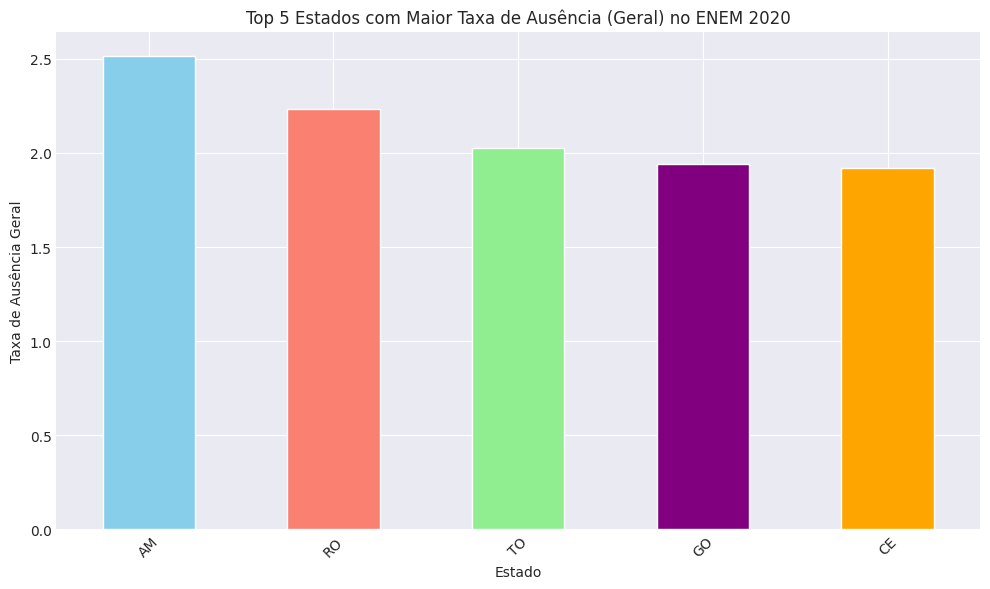

In [43]:
colors = ['skyblue', 'salmon', 'lightgreen', 'purple', 'orange']
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 6))

top5_estados_ausencia.plot(kind='bar', ax=ax, color=colors)

ax.set_title('Top 5 Estados com Maior Taxa de Ausência (Geral) no ENEM 2020')
ax.set_xlabel('Estado')
ax.set_ylabel('Taxa de Ausência Geral')
ax.set_xticklabels(top5_estados_ausencia.index, rotation=45)

plt.tight_layout()
plt.show()

**2) um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?**

In [44]:
enem_filtrado = enem[enem['TP_ANO_CONCLUIU'] != 0]

# Calculando a probabilidade de nota superior a 600 na redação por tempo desde a conclusão do segundo grau
redacao_probabilidade = enem_filtrado[enem_filtrado['NU_NOTA_REDACAO'] > 600].groupby('TP_ANO_CONCLUIU').size() / enem_filtrado.groupby('TP_ANO_CONCLUIU').size()

# Repetindo o processo para Ciências da Natureza
cn_probabilidade = enem_filtrado[enem_filtrado['NU_NOTA_CN'] > 600].groupby('TP_ANO_CONCLUIU').size() / enem_filtrado.groupby('TP_ANO_CONCLUIU').size()

# Comparando as tendências
print("Probabilidade de nota superior a 600 na redação:")
print(redacao_probabilidade)
print("\nProbabilidade de nota superior a 600 em Ciências da Natureza:")
print(cn_probabilidade)


Probabilidade de nota superior a 600 na redação:
TP_ANO_CONCLUIU
1     0.274235
2     0.229865
3     0.195814
4     0.173001
5     0.145173
6     0.129273
7     0.114839
8     0.102461
9     0.096989
10    0.088008
11    0.086119
12    0.085814
13    0.078898
14    0.070325
dtype: float64

Probabilidade de nota superior a 600 em Ciências da Natureza:
TP_ANO_CONCLUIU
1     0.061624
2     0.058214
3     0.055862
4     0.052426
5     0.044372
6     0.039770
7     0.036552
8     0.033297
9     0.033706
10    0.030717
11    0.030948
12    0.033238
13    0.029784
14    0.028828
dtype: float64


**2) VISUALIZAÇÃO GRÁFICO**

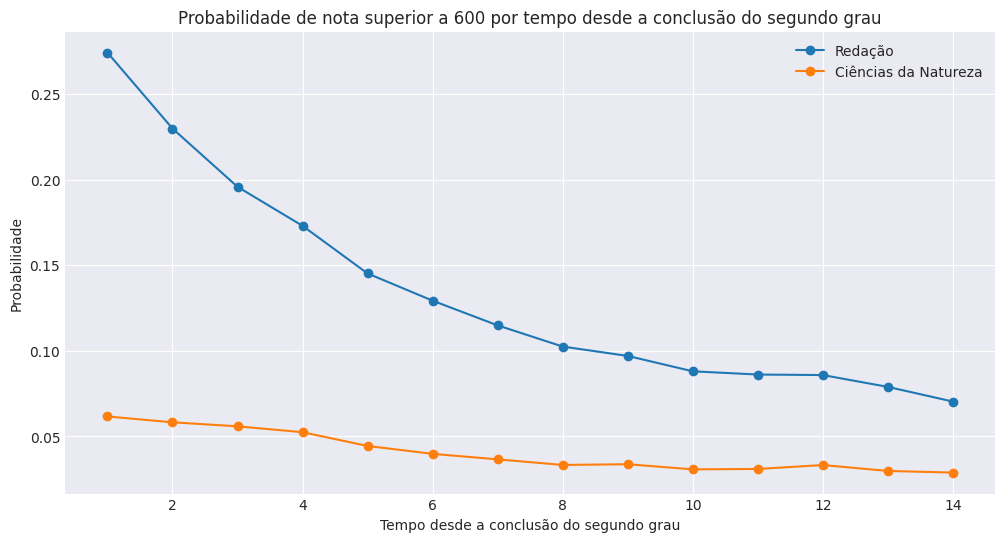

In [45]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))

redacao_probabilidade.plot(ax=ax, label='Redação', marker='o')
cn_probabilidade.plot(ax=ax, label='Ciências da Natureza', marker='o')

ax.set_title('Probabilidade de nota superior a 600 por tempo desde a conclusão do segundo grau')
ax.set_xlabel('Tempo desde a conclusão do segundo grau')
ax.set_ylabel('Probabilidade')
ax.legend()

plt.show()

**3) Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?**

In [46]:
enem_filtrado = enem[(enem['NU_NOTA_MT'] > 0) & (enem['TP_PRESENCA_MT'] == 1)].copy()

bins = [0, 400, 600, 800, 1000]
labels = ['0-400', '400-600', '600-800', '800-1000']
enem_filtrado['NU_NOTA_MT_DISCRETA'] = pd.cut(enem_filtrado['NU_NOTA_MT'], bins=bins, labels=labels)

grouped = enem_filtrado.groupby(['Q006', 'Q005', 'TP_FAIXA_ETARIA'])['NU_NOTA_MT'].mean().reset_index()
print(grouped)


     Q006  Q005  TP_FAIXA_ETARIA  NU_NOTA_MT
0       A   1.0                1  498.635714
1       A   1.0                2  477.035088
2       A   1.0                3  505.297674
3       A   1.0                4  504.015133
4       A   1.0                5  496.267069
...   ...   ...              ...         ...
3705    Q  20.0                2  567.700000
3706    Q  20.0                3  533.250000
3707    Q  20.0                4  774.500000
3708    Q  20.0                5  751.400000
3709    Q  20.0                8  719.450000

[3710 rows x 4 columns]


**RELAÇÃO RENDA E NOTA**

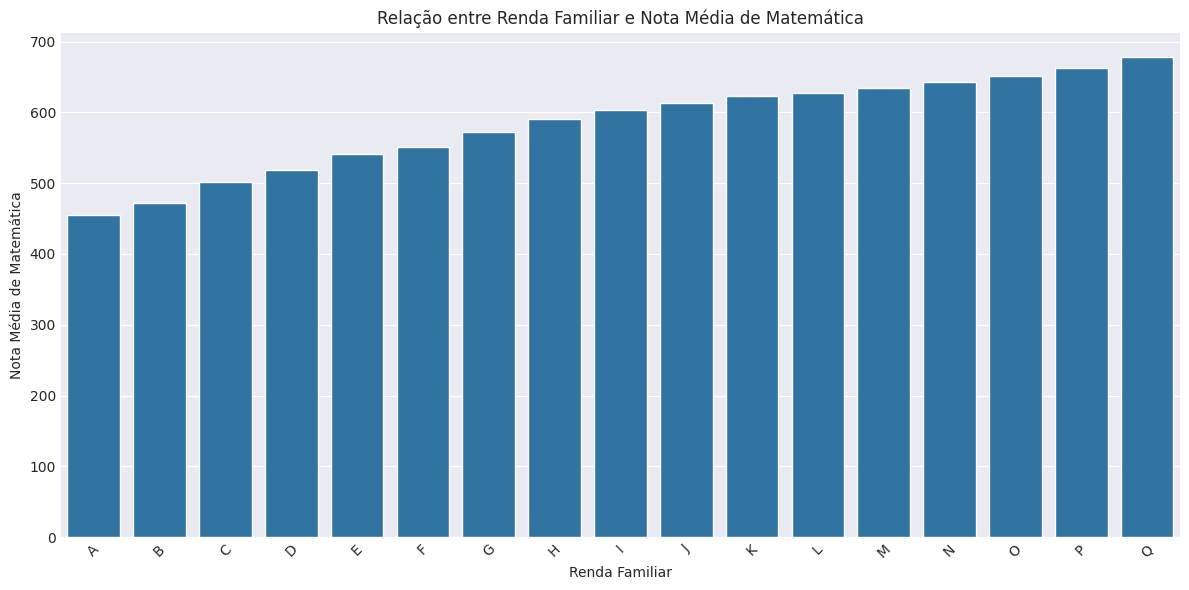

In [47]:
grouped = enem_filtrado.groupby('Q006')['NU_NOTA_MT'].mean().reset_index()
grouped.rename(columns={'Q006': 'Renda Familiar'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Renda Familiar', y='NU_NOTA_MT', data=grouped)
plt.title('Relação entre Renda Familiar e Nota Média de Matemática')
plt.xlabel('Renda Familiar')
plt.ylabel('Nota Média de Matemática')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**RELAÇÃO NÚMERO DE RESIDENTES E NOTA**

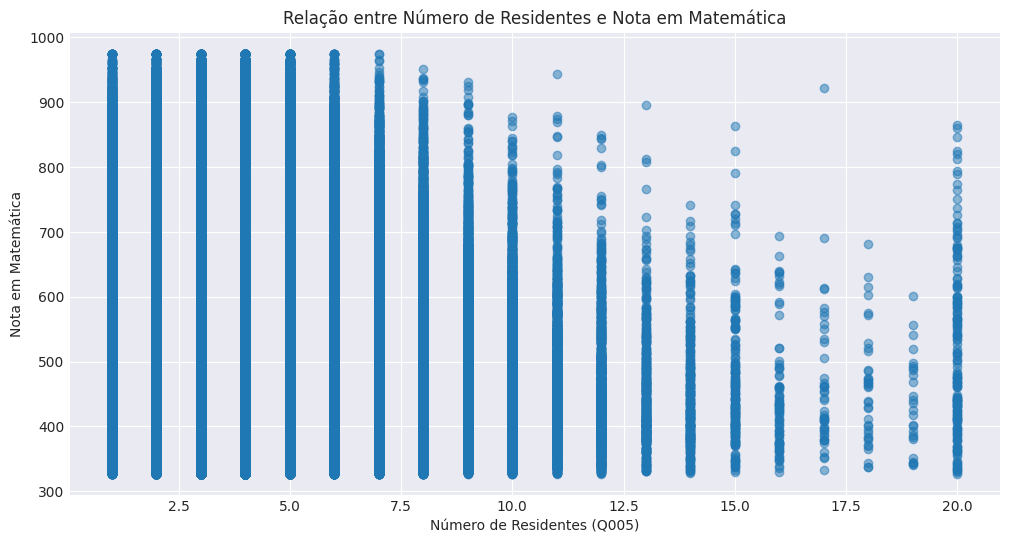

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(enem_filtrado['Q005'], enem_filtrado['NU_NOTA_MT'], alpha=0.5)
plt.xlabel('Número de Residentes (Q005)')
plt.ylabel('Nota em Matemática')
plt.title('Relação entre Número de Residentes e Nota em Matemática')
plt.show()